In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib
from scipy.signal import find_peaks

In [28]:
class spek:
    def __init__(self,path):
        data=np.loadtxt(path)
        self.steps=[]
        self.intensity=[]
        self.ru_lines=[495.31,496.39,498.34,501.61,502.30,506.40,507.2,507.66,508.94,513.39,515.15,517.11,519.67,523.54,526.15,532.38,536.41,539.21,543.31,558.03,564.93,565.53,572.57,589.16,589.75,620.8,630.01,607.24,616.13]
        for line in data:
            self.steps.append(line[0])
            self.intensity.append(line[1])
        self.steps,self.intensity=np.array(self.steps),np.array(self.intensity)
        self.peaks_index=self.peaks()
        self.steps_cali=self.cali()

    def peaks(self):
        peaks_arr=find_peaks(self.intensity,height=0.01)[0]
        peaks_arr=np.delete(peaks_arr,[0,1,2,14])
        peaks_arr=np.append(peaks_arr,[3664,3796])
        return peaks_arr

    def cali(self):
        p=np.polyfit(self.steps[self.peaks_index],self.ru_lines,2)
        return p[0]*self.steps**2+p[1]*self.steps+p[2]



    def plot_spectrum(self):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Rubidium Spektrum gemesssen mit dem Prismenspektrometer")
        fig1.set_ylabel("Intensity in a.u.")
        fig1.set_xlabel("pmt Position")
        fig1.set_xlim(10000,40000)
        fig1.plot(self.steps,self.intensity,label=f"Gemessenes Ru-Spektrum")
        fig1.plot(self.steps[self.peaks_index],self.intensity[np.array(self.peaks_index)],"o",label="Identifizierte Peaks")
        plt.tight_layout()
        plt.legend()
        plt.show()

    def plot_cali(self):
        fig = plt.figure(figsize=(11, 6))
        gs = GridSpec(8, 5)
        fig1 = fig.add_subplot(gs[:, :])
        fig1.set_title("Kalibration des Prismenspektrometers mittels eines  Rubidium Spektrums")
        fig1.set_ylabel("$\lambda_{Ru}$ in nm")
        fig1.set_xlabel("pmt Position")
        fig1.set_xlim(10000,40000)
        fig1.scatter(self.steps[self.peaks_index],self.ru_lines)
        fig1.plot(self.steps,self.steps_cali)
        plt.tight_layout()
        plt.show()

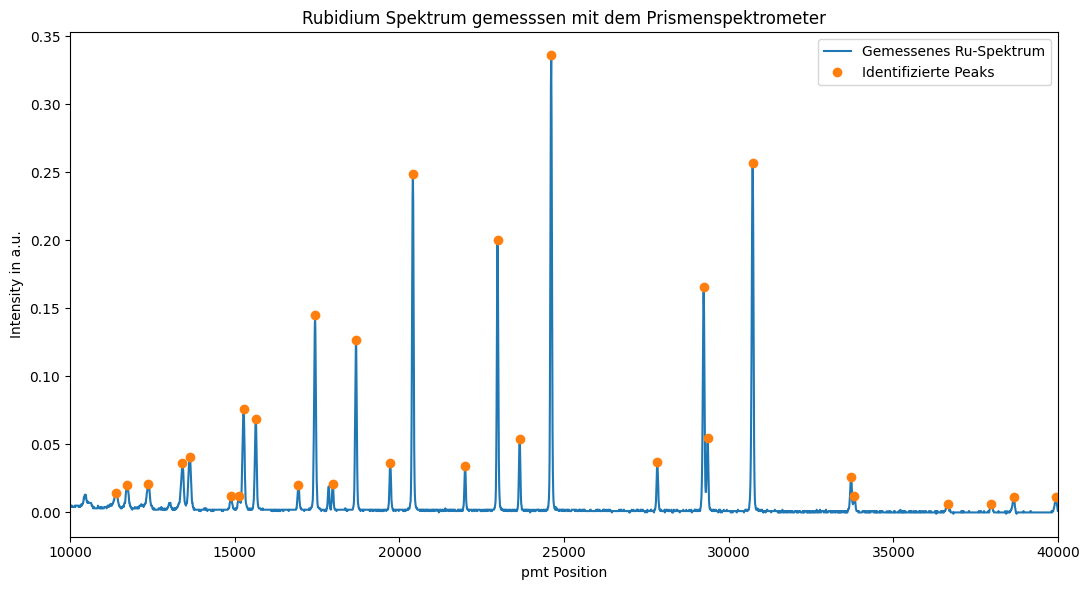

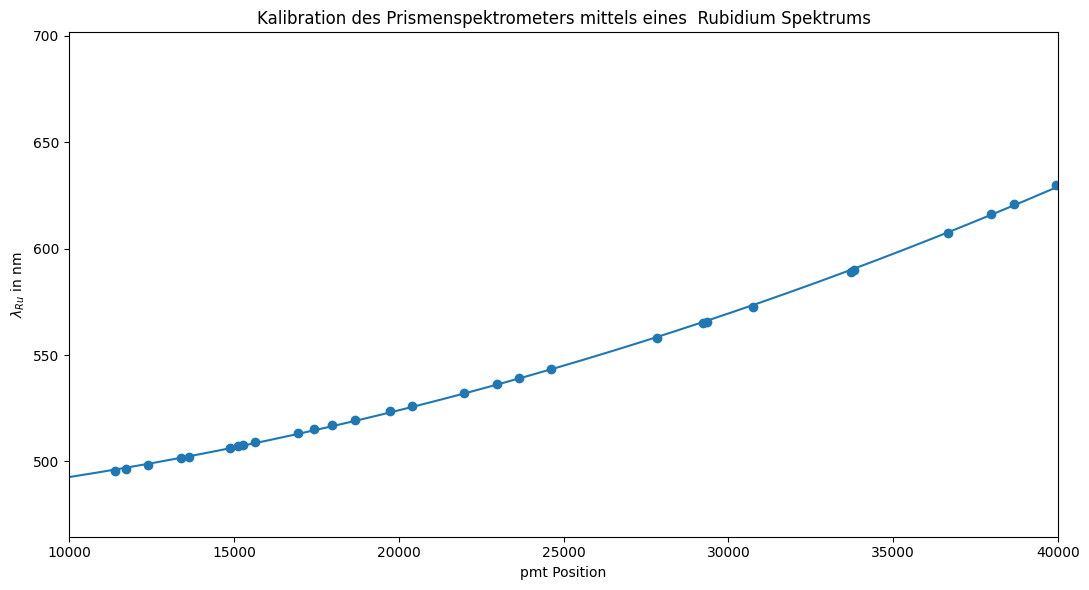

In [29]:
file="ru_spektrum.dat"#"1_-4_ohneLinse.dat"
spek1=spek(f"data/{file}")
spek1.plot_spectrum()
spek1.plot_cali()